In [4]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder

In [5]:
homes = pd.read_csv('homes_final.csv')
homes

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,4,2010,WD,Normal,142125


In [108]:
X = homes.copy().drop(['SalePrice', 'Unnamed: 0'], axis = 1)
y = np.log(homes.copy()['SalePrice'])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
lencoder = LabelEncoder()

In [27]:
def numer_label(DF):
    '''
    Assign numeric labels to values in non-numeric columns.
    To prepare data for gradient boosting regressor.
    '''
    categ_cols = list(filter(lambda name: DF[name].dtype == 'O', DF.columns))
    for name in categ_cols:
        DF[name] = lencoder.fit_transform(DF[name])
    return DF

In [115]:
X_train_gbr = numer_label(X_train.copy())
X_test_gbr = numer_label(X_test.copy())

In [116]:
gbr = GradientBoostingRegressor()

gb_params = {'n_estimators': [500, 1000, 1500, 2000],
             'learning_rate': 10**np.linspace(-3,0,4),
             'max_depth': [1, 2, 3]}

gs = GridSearchCV(gbr, gb_params, scoring = 'r2', cv = 5)

gs.fit(X_train_gbr, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'max_depth': [1, 2, 3],
                         'n_estimators': [500, 1000, 1500, 2000]},
             scoring='r2')

In [117]:
gbr_best = GradientBoostingRegressor(n_estimators=1000)

In [118]:
print(gbr_best.score(X_train_gbr, y_train))
print(gbr_best.score(X_test_gbr, y_test)) #best model from cross-validation yields severe overfitting

0.9983828607801926
0.8400422844582863


In [119]:
# Plotting train/test score for various learning_rates and max_depths n_estimator=500

learning_rates = 10**np.linspace(-3, 0, 20)
train_scores = []
test_scores = []
gbr = GradientBoostingRegressor()
for rate in learning_rates:
    gbr.set_params(n_estimators = 500, learning_rate = rate, max_depth = 1)
    gbr.fit(X_train_gbr, y_train)
    train_scores.append(gbr.score(X_train_gbr, y_train))
    test_scores.append(gbr.score(X_test_gbr, y_test))
    
pd.DataFrame({'learning_rate': learning_rates, 'train_scores': train_scores, 'test_scores': test_scores})

,learning_rate,train_scores,test_scores
0,0.001000,0.299161,0.281779
1,0.001438,0.380530,0.360382
2,0.002069,0.471557,0.448409
3,0.002976,0.565999,0.539805
4,0.004281,0.654390,0.626527
5,0.006158,0.730837,0.701716
6,0.008859,0.792461,0.763520
7,0.012743,0.838728,0.815785
8,0.018330,0.870846,0.845682
9,0.026367,0.892726,0.863843


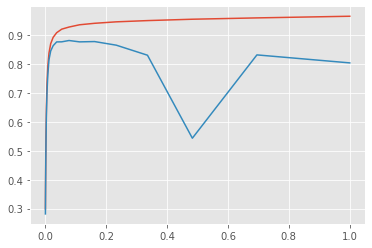

In [120]:
plt.plot(learning_rates, train_scores)
plt.plot(learning_rates, test_scores)

In [121]:
learning_rates = 10**np.linspace(-3, 0, 20)
train_scores = []
test_scores = []
gbr = GradientBoostingRegressor()
for rate in learning_rates:
    gbr.set_params(n_estimators = 500, learning_rate = rate, max_depth = 2)
    gbr.fit(X_train_gbr, y_train)
    train_scores.append(gbr.score(X_train_gbr, y_train))
    test_scores.append(gbr.score(X_test_gbr, y_test))
    
pd.DataFrame({'learning_rate': learning_rates, 'train_scores': train_scores, 'test_scores': test_scores})

,learning_rate,train_scores,test_scores
0,0.001000,0.406664,0.387537
1,0.001438,0.511244,0.487147
2,0.002069,0.618514,0.591439
3,0.002976,0.715963,0.687176
4,0.004281,0.794424,0.769694
5,0.006158,0.850070,0.825981
6,0.008859,0.887888,0.859990
7,0.012743,0.913394,0.878926
8,0.018330,0.931657,0.886344
9,0.026367,0.943135,0.885438


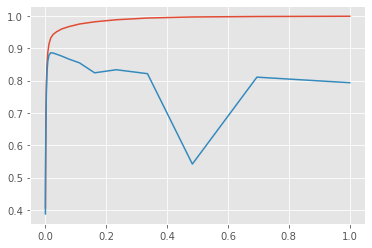

In [122]:
plt.plot(learning_rates, train_scores)
plt.plot(learning_rates, test_scores)

In [123]:
learning_rates = 10**np.linspace(-3, 0, 20)
train_scores = []
test_scores = []
gbr = GradientBoostingRegressor()
for rate in learning_rates:
    gbr.set_params(n_estimators = 500, learning_rate = rate, max_depth = 3)
    gbr.fit(X_train_gbr, y_train)
    train_scores.append(gbr.score(X_train_gbr, y_train))
    test_scores.append(gbr.score(X_test_gbr, y_test))
    
pd.DataFrame({'learning_rate': learning_rates, 'train_scores': train_scores, 'test_scores': test_scores})

,learning_rate,train_scores,test_scores
0,0.001000,0.466783,0.440437
1,0.001438,0.579661,0.549209
2,0.002069,0.692068,0.658240
3,0.002976,0.787330,0.751716
4,0.004281,0.858842,0.821937
5,0.006158,0.904637,0.867495
6,0.008859,0.931224,0.888033
7,0.012743,0.948386,0.894993
8,0.018330,0.960179,0.889178
9,0.026367,0.968746,0.876240


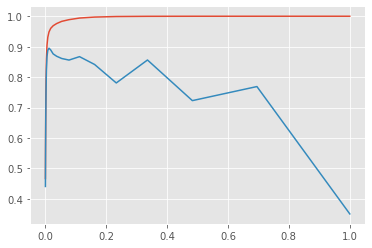

In [124]:
plt.plot(learning_rates, train_scores)
plt.plot(learning_rates, test_scores)

In [133]:
# Get good balance between test/train score at learning_rate = 0.037927, max_depth = 1

gbr.set_params(n_estimators = 500, learning_rate = 0.037927, max_depth = 1)

GradientBoostingRegressor(learning_rate=0.037927, max_depth=1, n_estimators=500)

In [126]:
test_data = pd.read_csv('test_final.csv').drop('Unnamed: 0', axis = 1)
test_data = numer_label(test_data)
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80,11622,1,3,3,0,4,0,...,140,0,0,0,120,0,6,2010,8,4
1,20,3,81,14267,1,0,3,0,0,0,...,393,36,0,0,0,12500,6,2010,8,4
2,60,3,74,13830,1,0,3,0,4,0,...,212,34,0,0,0,0,3,2010,8,4
3,60,3,78,9978,1,0,3,0,4,0,...,360,36,0,0,0,0,6,2010,8,4
4,120,3,43,5005,1,0,1,0,4,0,...,0,82,0,0,144,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,21,1894,1,3,3,0,4,0,...,0,24,0,0,0,0,4,2006,8,0
1456,20,3,160,20000,1,3,3,0,4,0,...,474,0,0,0,0,0,9,2006,8,0
1457,85,3,62,10441,1,3,3,0,4,0,...,80,32,0,0,0,700,7,2006,8,4


In [134]:
predictions = pd.DataFrame({'Id': np.arange(1461, 2920), 'SalePrice': np.e**gbr.predict(test_data)})
predictions.to_csv('predictions.csv', index = False)
# get Kaggle score of 0.28833 (position 3793)

,Id,SalePrice
0,1461,165981.996685
1,1462,166683.004089
2,1463,167055.552750
3,1464,167798.031070
4,1465,166170.870043
...,...,...
1454,2915,161841.022237
1455,2916,161885.581122
1456,2917,167302.094057
1457,2918,164136.768304


ELASTIC NET REGRESSION:

In [156]:
X_dum = pd.get_dummies(X)
X_train_dum, X_test_dum, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=42)

In [157]:
# Cross-validation for elastic net regression

param_grid = {'alpha': np.linspace(.0001, .0101, 101), 'l1_ratio': np.linspace(.01, 1, 100)}
enet = ElasticNet(normalize = True, max_iter = 100000)
gs = GridSearchCV(estimator = enet, param_grid = param_grid, cv = 5, scoring = 'r2')
gs.fit(X_train_dum, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000, normalize=True),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='r2')

In [159]:
enet_best = gs.best_estimator_
enet_best

ElasticNet(alpha=0.0005, l1_ratio=0.06999999999999999, max_iter=100000,
           normalize=True)

In [160]:
print(enet_best.score(X_train_dum, y_train))
print(enet_best.score(X_test_dum, y_test))

0.9204854446594319
0.9042343968482067


In [167]:
test_data = pd.read_csv('test_final.csv').drop('Unnamed: 0', axis = 1)
test_data = pd.get_dummies(test_data)
test_data # problem: fewer columns in dummified test_data
          # refit lasso regression using only columns that appear in test_data

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

In [174]:
test_cols = list(filter(lambda x: x in test_data.columns, X_train_dum.columns))

param_grid = {'alpha': np.linspace(.0001, .0101, 101), 'l1_ratio': np.linspace(.01, 1, 100)}
enet = ElasticNet(normalize = True, max_iter = 100000)
gs = GridSearchCV(estimator = enet, param_grid = param_grid, cv = 5, scoring = 'r2')
gs.fit(X_train_dum[test_cols], y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000, normalize=True),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='r2')

In [176]:
enet_best = gs.best_estimator_

In [186]:
print(enet_best.score(X_train_dum[test_cols], y_train))
print(enet_best.score(X_test_dum[test_cols], y_test))

# No evidence of overfitting

0.9076400304898021
0.8994205063507905


In [184]:
np.e**enet_best.predict(test_data)

array([119639.92289783, 150266.17483862, 178185.52993232, ...,
       162140.24731615, 115527.22713098, 218659.61569295])

In [187]:
predictions_enet = pd.DataFrame({'Id': np.arange(1461, 2920), 'SalePrice': np.e**enet_best.predict(test_data)})
predictions_enet.to_csv('predictions_enet.csv', index = False) 
# Kaggle score improved to 0.14417 (position 2281)